In [7]:
import numpy as np
from astropy.io import ascii
import os

# === Config ===
base_dir = "/Volumes/MY_SSD_1TB/Work_PhD/July-August/CEERS_data/SEP_JWST/Results/nircam8/catalogue_z7/"
filters = ["f115w", "f150w", "f200w", "f277w", "f356w", "f410w", "f444w"]
object_ids = [1398, 2080, 2288, 4493, 6986, 8954, 9454, 11712, 14604]

rows = []

for obj_id in object_ids:
    for flt in filters:
        cat_path = os.path.join(base_dir, f"f150dropout_{flt}_catalog.cat")
        flux, fluxerr, snr = np.nan, np.nan, np.nan
        if os.path.exists(cat_path):
            cat = ascii.read(cat_path)

            # Find row where NUMBER == obj_id
            match = cat[cat["NUMBER"] == obj_id]

            if len(match) > 0:  # object found
                flux = match["FLUX_AUTO"][0]
                fluxerr = match["FLUXERR_AUTO"][0]
                snr = flux / fluxerr if fluxerr > 0 else np.nan

        rows.append((obj_id, flt.upper(), flux, fluxerr, snr))

# === Show table inline ===
from IPython.display import display, HTML

html_table = "<table border=1><tr><th>ID</th><th>Filter</th><th>FLUX_AUTO</th><th>FLUXERR_AUTO</th><th>SNR</th></tr>"
for row in rows:
    html_table += f"<tr><td>{row[0]}</td><td>{row[1]}</td><td>{row[2]:.4f}</td><td>{row[3]:.4f}</td><td>{row[4]:.2f}</td></tr>"
html_table += "</table>"

display(HTML(html_table))

# === Save to TXT ===
txt_filename = os.path.join(base_dir, "nircam8_SNR_table.txt")
with open(txt_filename, "w") as f:
    f.write(f"{'ID':<8}{'Filter':<8}{'FLUX_AUTO':>15}{'FLUXERR_AUTO':>15}{'SNR':>15}\n")
    f.write("="*65 + "\n")
    for row in rows:
        f.write(f"{row[0]:<8}{row[1]:<8}{row[2]:>15.4f}{row[3]:>15.4f}{row[4]:>15.2f}\n")

print(f"\n✅ Table saved as {txt_filename}")


ID,Filter,FLUX_AUTO,FLUXERR_AUTO,SNR
1398,F115W,0.4023,0.0430,9.35
1398,F150W,1.2756,0.0002,6932.01
1398,F200W,0.9653,0.0001,6848.42
1398,F277W,1.2448,0.0001,13662.09
1398,F356W,1.1712,0.0385,30.45
1398,F410W,nan,nan,nan
1398,F444W,1.8069,0.0001,23750.40
2080,F115W,0.1541,0.0520,2.96
2080,F150W,1.4796,0.0002,6650.58
2080,F200W,1.4388,0.0002,8442.99



✅ Table saved as /Volumes/MY_SSD_1TB/Work_PhD/July-August/CEERS_data/SEP_JWST/Results/nircam8/catalogue_z7/nircam8_SNR_table.txt


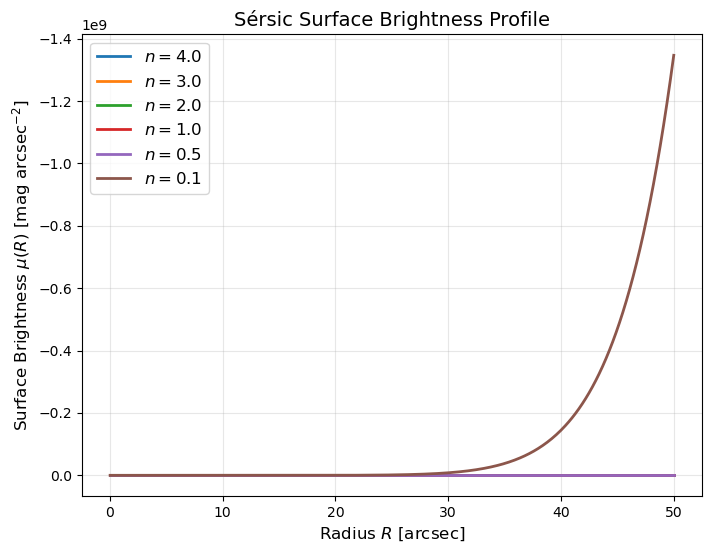

In [4]:
# ---
# Jupyter Notebook: Plotting the Sersic Profile (magnitude form)
# ---

import numpy as np
import matplotlib.pyplot as plt

# === Sersic profile parameters ===
mu_e = 20.0        # effective surface brightness in mag/arcsec^2
Re = 5.0           # effective radius (arcsec)
N = [4.0, 3.0, 2.0, 1.0, 0.5, 0.1]  # Sersic indices

# === Define function for mu(R) ===
def mu_sersic(R, mu_e, Re, n, beta_n):
    return mu_e + 1.086 * beta_n * ((R/Re)**(1/n) - 1)

# === Plot setup ===
plt.figure(figsize=(8,6))
R = np.linspace(0.01, 50, 500)  # radius in arcsec

for n in N:
    # Approximation for beta_n
    beta_n = 2 * n - 0.324
    mu_R = mu_sersic(R, mu_e, Re, n, beta_n)
    plt.plot(R, mu_R, lw=2, label=fr"$n={n}$")

# Axes labels
plt.xlabel(r"Radius $R$ [arcsec]", fontsize=12)
plt.ylabel(r"Surface Brightness $\mu(R)$ [mag arcsec$^{-2}$]", fontsize=12)

# In magnitudes, brighter is lower value, so invert y-axis
plt.gca().invert_yaxis()

# Legend, grid, title
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.title("Sérsic Surface Brightness Profile", fontsize=14)

plt.show()


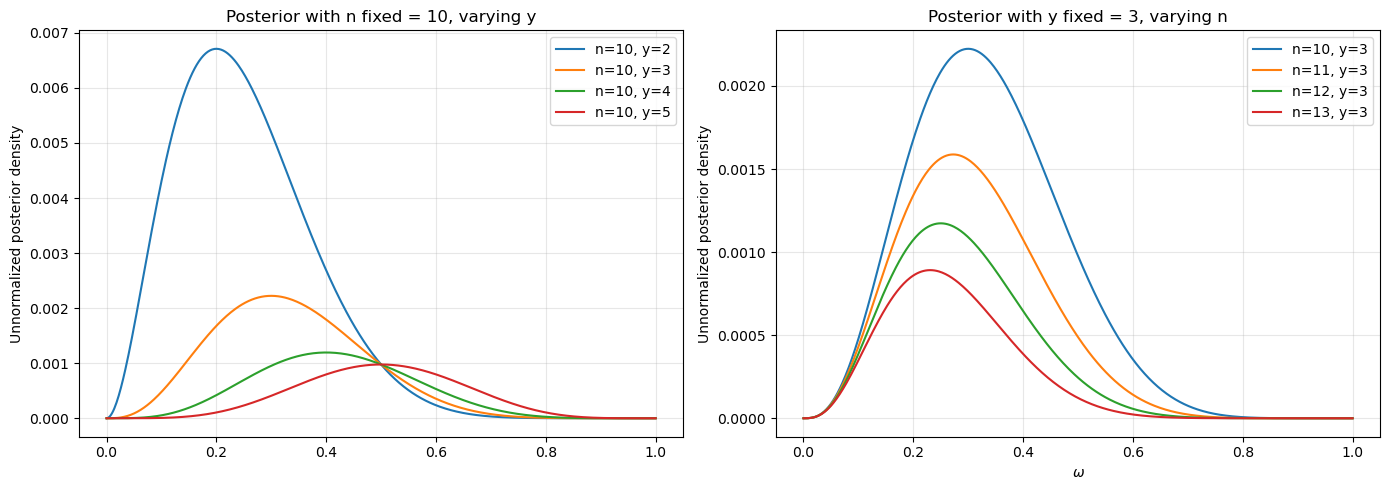

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def unnormalized_posterior(x, y, n):
    """Compute unnormalized posterior ω^y (1-ω)^(n-y)."""
    log_vals = y * np.log(x) + (n - y) * np.log(1 - x)
    return np.exp(log_vals)

# Grid for ω
x = np.linspace(1e-4, 1 - 1e-4, 500)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# --- Subplot 1: fix n, vary y ---
n_fixed = 10
ys = [2, 3, 4, 5]
for y in ys:
    axes[0].plot(x, unnormalized_posterior(x, y, n_fixed),
                 label=f"n={n_fixed}, y={y}")
axes[0].set_title(f"Posterior with n fixed = {n_fixed}, varying y")
axes[0].set_ylabel("Unnormalized posterior density")
axes[0].legend()
axes[0].grid(alpha=0.3)

# --- Subplot 2: fix y, vary n ---
y_fixed = 3
ns = [10, 11, 12, 13]
for n in ns:
    axes[1].plot(x, unnormalized_posterior(x, y_fixed, n),
                 label=f"n={n}, y={y_fixed}")
axes[1].set_title(f"Posterior with y fixed = {y_fixed}, varying n")
axes[1].set_xlabel(r"$\omega$")
axes[1].set_ylabel("Unnormalized posterior density")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("figure2_2.png", dpi=300)
plt.show()


In [21]:
pip install --upgrade numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 23.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.2 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


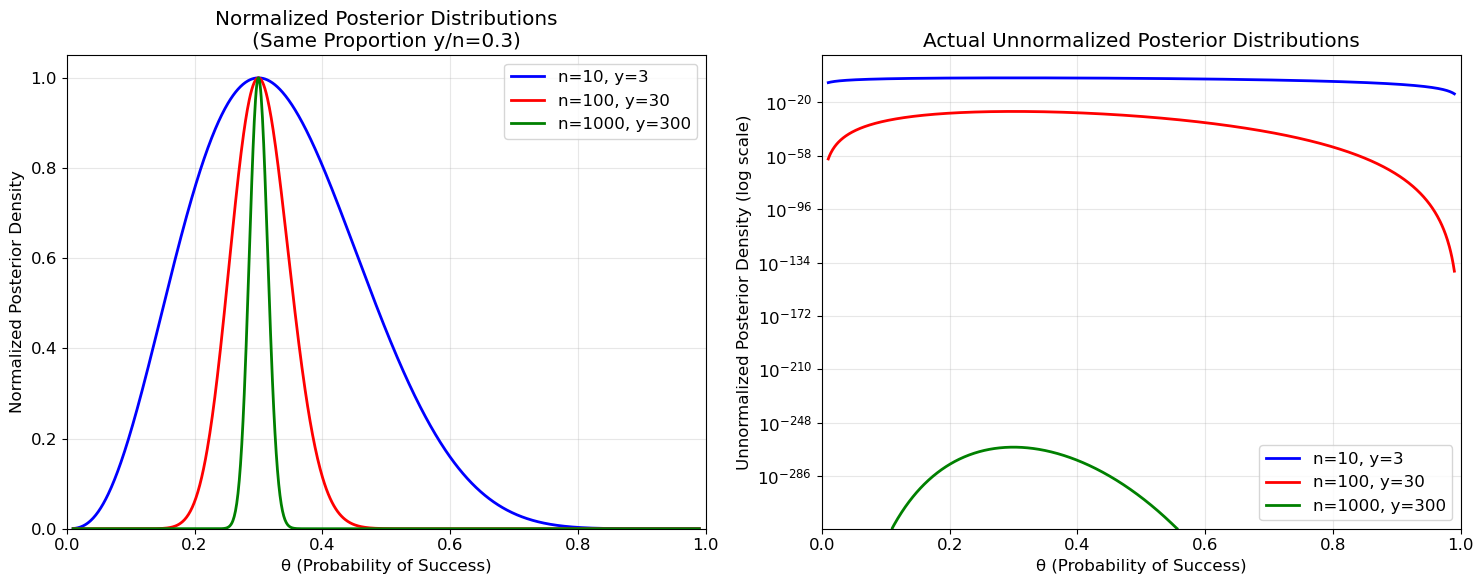

Bayesian Posterior Analysis for Binomial Data
For n=10, y=3:
  Sample proportion: 0.300
  Posterior mean: 0.333
  Laplace's prediction for next trial: 0.333

For n=100, y=30:
  Sample proportion: 0.300
  Posterior mean: 0.304
  Laplace's prediction for next trial: 0.304

For n=1000, y=300:
  Sample proportion: 0.300
  Posterior mean: 0.300
  Laplace's prediction for next trial: 0.300



In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the plot style manually
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Define the range of theta values
theta = np.linspace(0.01, 0.99, 1000)  # Avoid 0 and 1 to prevent numerical issues

# Define the different cases
cases = [
    {'n': 10, 'y': 3, 'color': 'blue', 'label': 'n=10, y=3'},
    {'n': 100, 'y': 30, 'color': 'red', 'label': 'n=100, y=30'},
    {'n': 1000, 'y': 300, 'color': 'green', 'label': 'n=1000, y=300'}
]

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Normalized posteriors
for case in cases:
    n, y = case['n'], case['y']
    # Calculate unnormalized posterior: θ^y * (1-θ)^(n-y)
    posterior = theta**y * (1-theta)**(n-y)
    
    # Normalize for better visualization
    posterior_normalized = posterior / np.max(posterior)
    
    ax1.plot(theta, posterior_normalized, color=case['color'], linewidth=2, label=case['label'])

ax1.set_xlabel('θ (Probability of Success)')
ax1.set_ylabel('Normalized Posterior Density')
ax1.set_title('Normalized Posterior Distributions\n(Same Proportion y/n=0.3)')
ax1.legend()
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1.05)

# Second subplot: Actual unnormalized posteriors (log scale)
for case in cases:
    n, y = case['n'], case['y']
    # Calculate unnormalized posterior: θ^y * (1-θ)^(n-y)
    posterior = theta**y * (1-theta)**(n-y)
    
    ax2.plot(theta, posterior, color=case['color'], linewidth=2, label=case['label'])

ax2.set_xlabel('θ (Probability of Success)')
ax2.set_ylabel('Unnormalized Posterior Density (log scale)')
ax2.set_title('Actual Unnormalized Posterior Distributions')
ax2.legend()
ax2.set_xlim(0, 1)
ax2.set_yscale('log')  # Use log scale to see all curves

plt.tight_layout()
plt.show()

# Print some information about the distributions
print("Bayesian Posterior Analysis for Binomial Data")
print("=" * 50)
for case in cases:
    n, y = case['n'], case['y']
    posterior_mean = (y + 1) / (n + 2)  # Using the formula from the document
    print(f"For n={n}, y={y}:")
    print(f"  Sample proportion: {y/n:.3f}")
    print(f"  Posterior mean: {posterior_mean:.3f}")
    print(f"  Laplace's prediction for next trial: {(y+1)/(n+2):.3f}")
    print()